In [101]:
import os
import sys
sys.path.insert(0, "/home/qiyuan/sp/mitsuba3_new/build/python")

import mitsuba as mi
import drjit as dr

from typing import Union
import matplotlib.pyplot as plt
import numpy as np

print("Loaded Mitsuba from: ", os.path.dirname(mi.__file__))
print("Loaded Mitsuba from: ", os.path.dirname(dr.__file__))

mi.set_variant("scalar_rgb")
# mi.set_variant("llvm_ad_rgb")
# mi.set_variant("cuda_ad_rgb")

scene_path = "/home/qiyuan/sp/mitsuba3_new/notebooks/curves_aov.xml"
scene = mi.load_file(scene_path)
print("Loaded scene file from: ", scene_path)

image = mi.render(scene, spp=1)
img_np = np.array(image)

Loaded Mitsuba from:  /home/qiyuan/sp/mitsuba3_new/build/python/mitsuba
Loaded Mitsuba from:  /home/qiyuan/sp/mitsuba3_new/build/python/drjit


2022-12-16 13:43:52 INFO main [xml.cpp:1405] Loading XML file "/home/qiyuan/sp/mitsuba3_new/notebooks/curves_aov.xml" with variant "scalar_rgb"..

2022-12-16 13:43:52 DEBUG wrk18 [LinearCurve] Loading a linear curve file from "linear_sample_2cps.txt" ..

2022-12-16 13:43:52 DEBUG wrk18 [LinearCurve] Loaded a control point [0, 0, 0] with radius 1.000000

2022-12-16 13:43:52 DEBUG wrk18 [LinearCurve] Loaded a control point [10, 0, 0] with radius 2.000000

2022-12-16 13:43:52 DEBUG wrk18 [LinearCurve] "linear_sample_2cps.txt": read 2 control points (32 B in 3ms)

2022-12-16 13:43:52 INFO main [Scene] Embree ready. (took 15ms)

2022-12-16 13:43:52 INFO main [xml.cpp:1422] Done loading XML file "/home/qiyuan/sp/mitsuba3_new/notebooks/curves_aov.xml" (took 30ms).

Loaded scene file from:  /home/qiyuan/sp/mitsuba3_new/notebooks/curves_aov.xml


2022-12-16 13:43:52 INFO main [SamplingIntegrator] Starting render job (1024x768, 1 sample, 32 threads)

2022-12-16 13:43:53 INFO main [SamplingIntegrator] Rendering finished. (took 358ms)

In [139]:
ray = mi.Ray3f(mi.Point3f(7, 0, 1), mi.Vector3f(0, 0, -1))
si = scene.ray_intersect(ray)
print(f"u_local  : {si.dn_du.x}")
print(f"u_global : {si.uv.x}")
print(f"normal          : {si.n}")
print(f"hit position    : {si.p}")
print(f"center position : {si.dp_du}")
# si

u_local  : 0.7171717286109924
u_global : 0.6085858345031738
normal          : [-0.09999971836805344, 0.0, -0.994987428188324]
hit position    : [7.0, 0.0, -1.708564281463623]
center position : [7.171716690063477, 0.0, 0.0]


In [103]:
# scene_path = "/home/qiyuan/sp/mitsuba3/notebooks/curves_aov.xml"
# scene = mi.load_file(scene_path)
# print("Loaded scene file from: ", scene_path)

In [104]:
# image = mi.render(scene, spp=16)
# img_np = np.array(image)

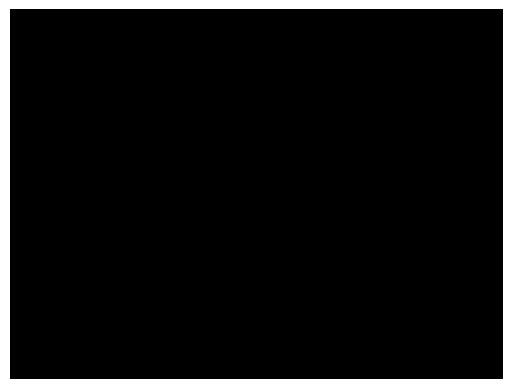

In [105]:
# path tracing image
plt.axis("off")
plt.imshow(img_np[:, :, 0:3])
plt.show()

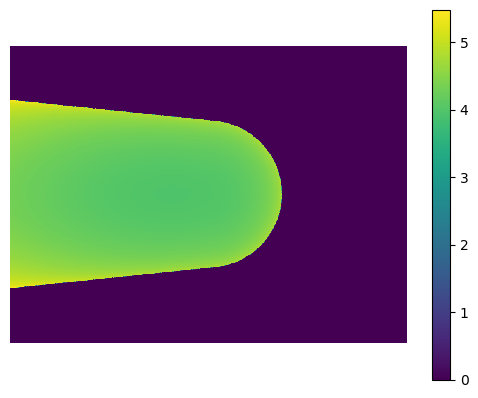

In [106]:
# depth image
depth = img_np[:, :, 3]
plt.axis("off")
plt.imshow(depth, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show() 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


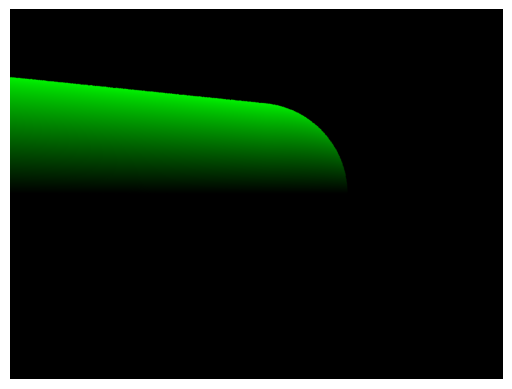

In [107]:
# sh_normal
plt.axis("off")
plt.imshow(img_np[:, :, 4:7])
plt.show()

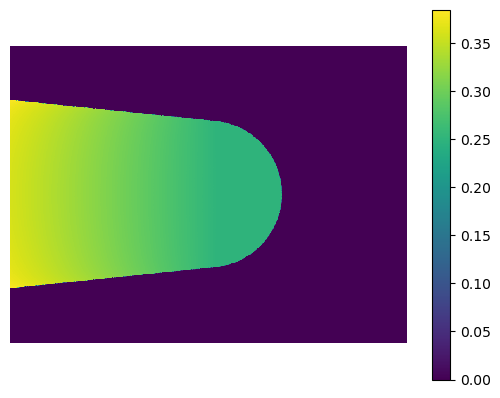

In [108]:
# u
plt.axis("off")
plt.imshow(img_np[:, :, 7], cmap='viridis', interpolation='nearest')
plt.colorbar()
# plt.clim(-2,2)
plt.show() 

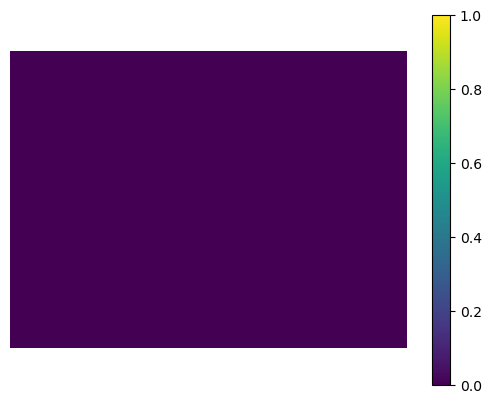

In [109]:
# v => norm(normal - normal_ground_truth)
plt.axis("off")
plt.imshow(img_np[:, :, 8], cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.clim(0,1)
plt.show() 

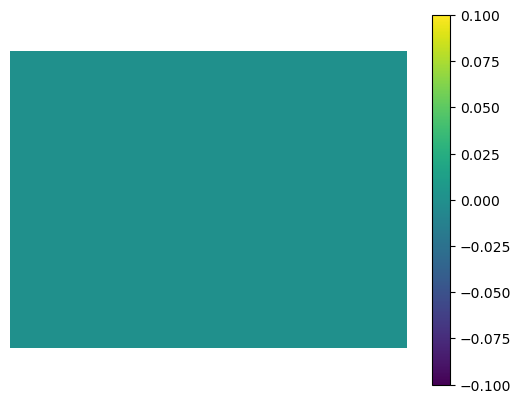

In [110]:
# prim_index
plt.axis("off")
plt.imshow(img_np[:, :, 9], cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show() 

In [111]:
mi.util.write_bitmap("./normal_error.exr", image[:, :, 8])